Notebook for 29-1-2025 of Stochastic Dynamical Modeling

In [116]:
# Libraries 

from pylab import *
import numpy as np
import matplotlib.pyplot as plt
import math
import matplotlib.colors as colors
from scipy import stats

# Define parameters for Euler - Marayama scheme 

# Start Xzero ~ 0 to avoid initial drift 

gamma=2.0; sigma = 0.1; Xzero=0.05

# view simulation as generating 100 years of daily data 

T=100; N=365*T; dt = float(T)/N
t=np.linspace(0,T,N+1)

# Define Wiener process realization

dW=np.sqrt(dt)*np.random.randn(1,N)
W=np.cumsum(dW)


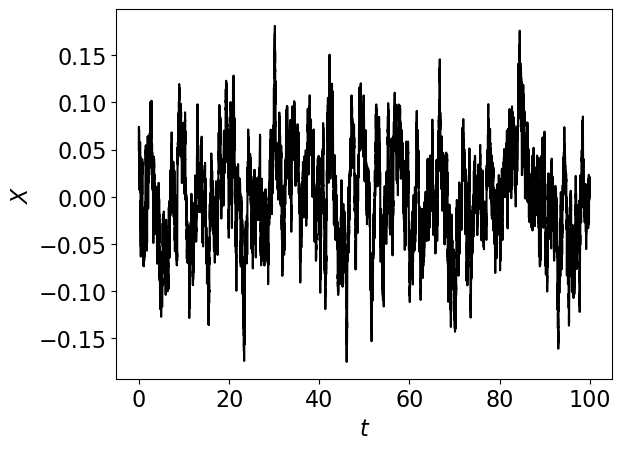

In [117]:
## Simulate the SDE
## dX_t = - \gamma X_T + \sigma dW_t 

Xem=np.zeros(N+1); Xem[0] = Xzero
for j in range(1,N+1):
    Winc=np.sum(dW[0][range(j-1,j)])
    Xem[j] = Xem[j-1] - dt*gamma*Xem[j-1] + sigma*Winc

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.plot(t,Xem,color='black')
plt.xlabel(r'$t$',fontsize=16); 
plt.ylabel(r'$X$',fontsize=16,rotation=90)
plt.show()

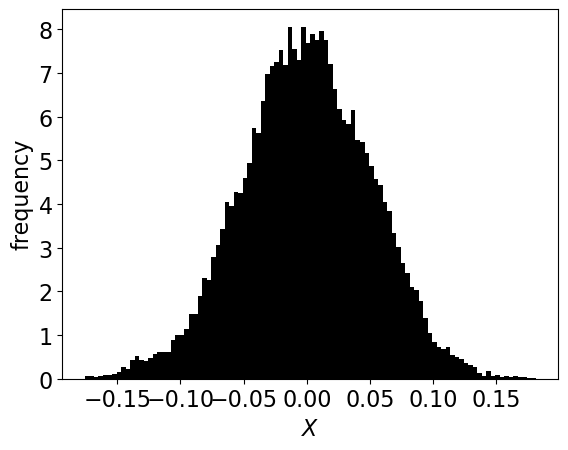

0.0 0.002611805291250795 -8.245032038617209e-06 2.0472156758452718e-05


In [118]:
## Plot the histogram of the time series above 

import scipy
from scipy.stats import skew, kurtosis

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.hist(Xem, bins = 100, density=True,color='black')
plt.xlabel(r'$X$',fontsize=16); 
plt.ylabel(r'frequency',fontsize=16,rotation=90)
plt.show()

# Compute moments 

M1 = scipy.stats.moment(Xem,moment = 1)
M2 = scipy.stats.moment(Xem,moment = 2)
M3 = scipy.stats.moment(Xem,moment = 3)
M4 = scipy.stats.moment(Xem,moment = 4)

print(M1,M2,M3,M4)

In [119]:
# Spectrum routine

def FourierSpectrum(time_series):
    """Determine the Fourier Spectrum of a given time series"""
    
    freq_series 	= fft(time_series) 					#Take fourier spectrum
    freq_series 	= ((real(freq_series)**2.0) + (imag(freq_series)**2.0)) #Determine power law (absolute value)
    freq		= fftfreq(len(time_series))
    freq_series 	= freq_series[:freq.argmax()]				#Restrict to f = 0.5
    freq		= freq[:freq.argmax()]					#Restrict to f = 0.5
    
    return freq, freq_series

[201.07476218]


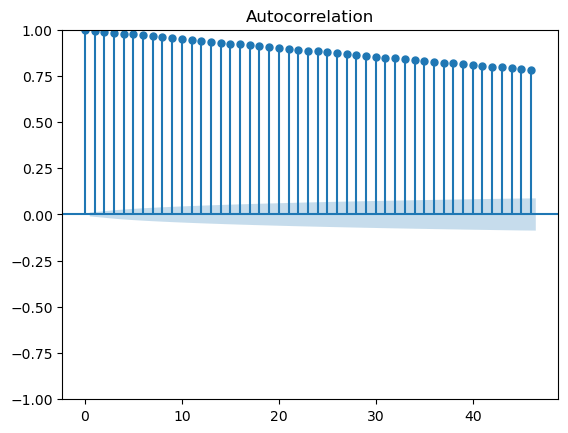

In [120]:
# Compute Autocorrelation of the Time Series

from statsmodels.graphics.tsaplots import plot_acf
plot_acf(Xem)

import statsmodels.api as sm

#calculate autocorrelations
adata = sm.tsa.acf(Xem,nlags = 10, fft = False)

# Fit exponential 

from scipy.optimize import curve_fit

def fitauto(t, a): 
    return np.exp(-t/a)

lags = np.linspace(1,10,num=11)
pars1, cov1 = curve_fit(f=fitauto, xdata=lags, ydata=adata, p0=[0.1], bounds=(-np.inf, np.inf))

gamma = pars1 

print(gamma)

Text(0, 0.5, 'Power')

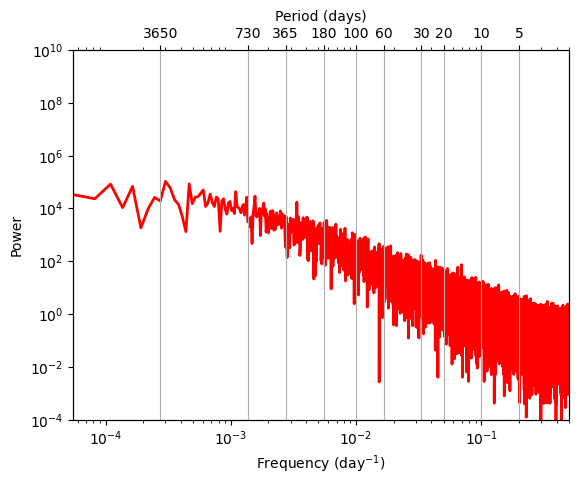

In [121]:
# Compute Spectrum, pretend daily data 

freq, freq_temp = FourierSpectrum(Xem)

#index       = np.where(freq >= 1.0 / 60.0)
index       = np.where(freq >= 1.0 / 100)

fig, ax1 = plt.subplots()

ax1.set_xlim([1.0/(50 * 365.0), 0.5])
ax1.set_xlabel('Frequency (day$^{-1}$)')
ax2 = ax1.twiny()

new_tick_locations = np.array([1.0/(365.0 * 10), 1.0/(365.0 * 2), 1.0/(365.0), 1.0/(6 * 30), 1.0/(100), 1.0/(2 * 30), 1.0/(1 * 30), 1.0 / (20.0), 1.0 / (10.0), 1.0/5.0])
ax2.set_xlabel('Period (days)')
ax2.set_xscale('log')

ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(new_tick_locations)
ax2.set_xticklabels([3650, 730, 365, 180, 100, 60, 30, 20, 10, 5])
ax2.grid()

graph_temp	= ax1.plot(freq, freq_temp, '-r', linewidth = 2, label = 'SST')

ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_ylim(10**(-4.0), 10**(10.0))
ax1.set_ylabel('Power')

In [112]:
# Fit power law 

freq_log     = np.log10(freq[index])
freq_temp_log = np.log10(freq_temp[index])

slope_temp, b_temp = polyfit(freq_log, freq_temp_log, 1)

print('Slope TEMP:', slope_temp)

Slope TEMP: -1.7697723565657593
